<a href="https://colab.research.google.com/github/nlane21/Class/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the data
url = 'https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv'
df = pd.read_csv(url)

In [3]:
#clean data
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64


In [4]:

# Check unique values per column
print(df.nunique().sort_values())

import numpy as np

df.replace('?', np.nan, inplace=True)


citoglipton                      1
examide                          1
acetohexamide                    2
glipizide-metformin              2
tolbutamide                      2
troglitazone                     2
metformin-rosiglitazone          2
glimepiride-pioglitazone         2
metformin-pioglitazone           2
change                           2
diabetesMed                      2
gender                           3
tolazamide                       3
readmitted                       3
max_glu_serum                    3
A1Cresult                        3
acarbose                         4
rosiglitazone                    4
pioglitazone                     4
miglitol                         4
glimepiride                      4
metformin                        4
nateglinide                      4
repaglinide                      4
chlorpropamide                   4
glipizide                        4
glyburide                        4
insulin                          4
glyburide-metformin 

In [6]:
# Readmitted Distribution
print(df['readmitted'].value_counts())


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [7]:
#Top Diagnoses
print(df['diag_1'].value_counts().head(10))


diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
427    2766
491    2275
715    2151
682    2042
434    2028
Name: count, dtype: int64


In [8]:
#Age
print(df['age'].value_counts().sort_index())


age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64


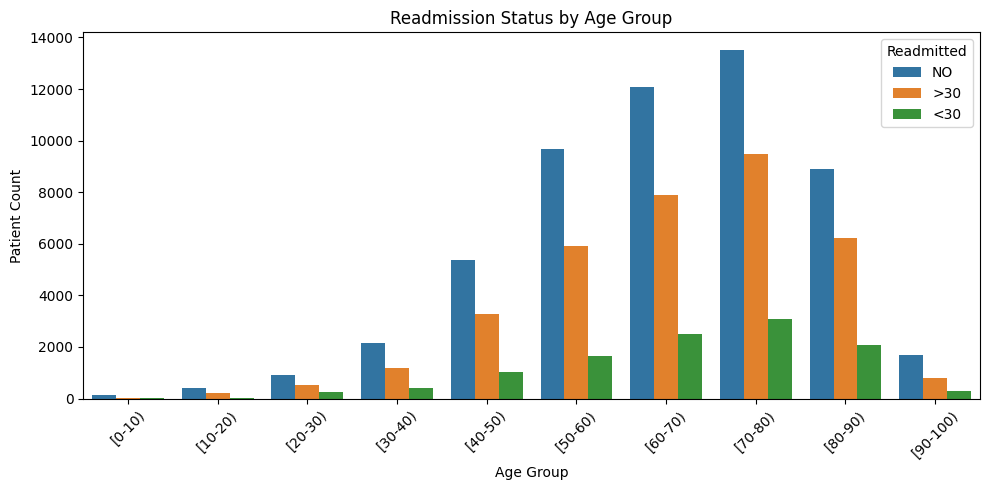

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='age', hue='readmitted', order=sorted(df['age'].unique()))
plt.title('Readmission Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Patient Count')
plt.legend(title='Readmitted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv'
df = pd.read_csv(url)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Filter out NaNs in primary diagnosis
df = df[df['diag_1'].notna()]

# Count top 10 most common diagnoses
top_diag = df['diag_1'].value_counts().head(10).index

# Filter to those top diagnoses
df_top_diag = df[df['diag_1'].isin(top_diag)]

# Group by diagnosis and readmission status
readmit_rate = (
    df_top_diag.groupby(['diag_1', 'readmitted'])
    .size()
    .unstack(fill_value=0)
)

# Calculate readmission percentages
readmit_rate['Total'] = readmit_rate.sum(axis=1)
readmit_rate['Readmit Rate'] = (
    readmit_rate.get('<30', 0) + readmit_rate.get('>30', 0)
) / readmit_rate['Total']

# Sort by readmission rate
readmit_rate_sorted = readmit_rate.sort_values('Readmit Rate', ascending=False)
print(readmit_rate_sorted[['Readmit Rate']])


readmitted  Readmit Rate
diag_1                  
491             0.597802
428             0.591227
486             0.479761
682             0.468658
434             0.452170
427             0.443239
786             0.425548
414             0.413311
410             0.397897
715             0.364017


<ipython-input-13-de5640df8944>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


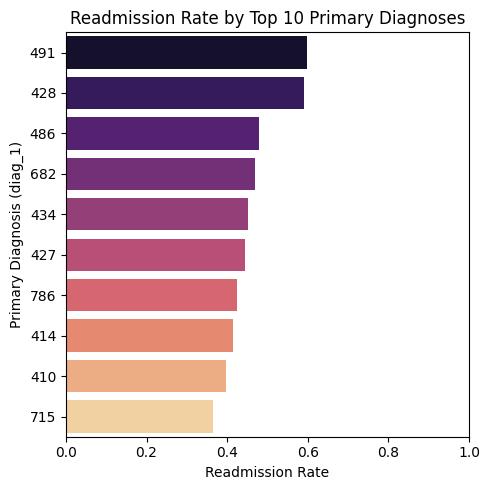

In [13]:
plt.figure(figsize=(5, 5))
sns.barplot(
    x=readmit_rate_sorted['Readmit Rate'],
    y=readmit_rate_sorted.index,
    palette='magma'
)
plt.title('Readmission Rate by Top 10 Primary Diagnoses')
plt.xlabel('Readmission Rate')
plt.ylabel('Primary Diagnosis (diag_1)')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()